In [1]:
import mlflow
mlflow.set_tracking_uri('http://127.0.0.1:5000')  # set up connection
mlflow.set_experiment('test-experiment')          # set the experiment
mlflow.sklearn.autolog()

In [2]:
%%javascript
// use javascript magic to get the filename of the current notebook
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
import os
# use nb_name set in the previous cell plus the current directory to the get the full path to the ipynb file
nb_full_path = os.path.join(os.getcwd(), nb_name)

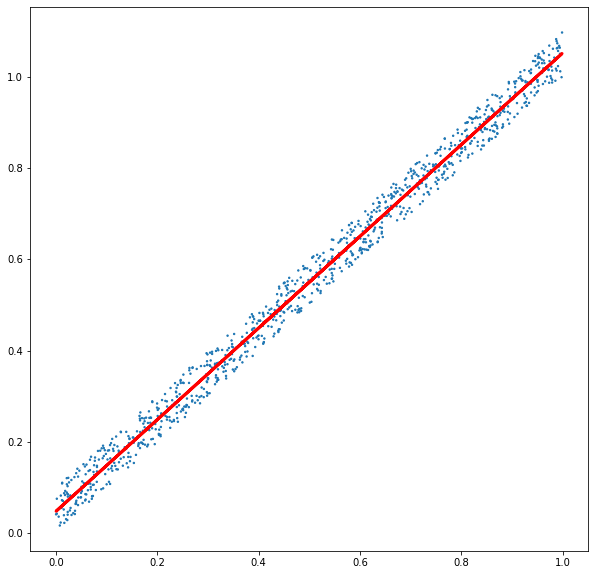

In [30]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

def make_data(num_points):
    x = np.random.rand(num_points, 1)
    e = np.random.rand(num_points, 1) / 10.0
    y = x + e
    return x, y

def plot(x, y, model):
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, [2]*len(x))
    y_pred = model.predict(x)
    plt.plot(x, y_pred, color='red', linewidth=3)

def mlflow_log():
    filename = 'scatter.png'
    plt.savefig(filename)
    mlflow.log_artifact(filename, 'scatter plot with fit line')
    mlflow.log_artifact(nb_full_path, 'notebook source') 

num_points = 1000
with mlflow.start_run():
    x, y = make_data(num_points)
    model = LinearRegression()
    model.fit(x, y)
    plot(x, y, model)
    mlflow_log()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:677: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


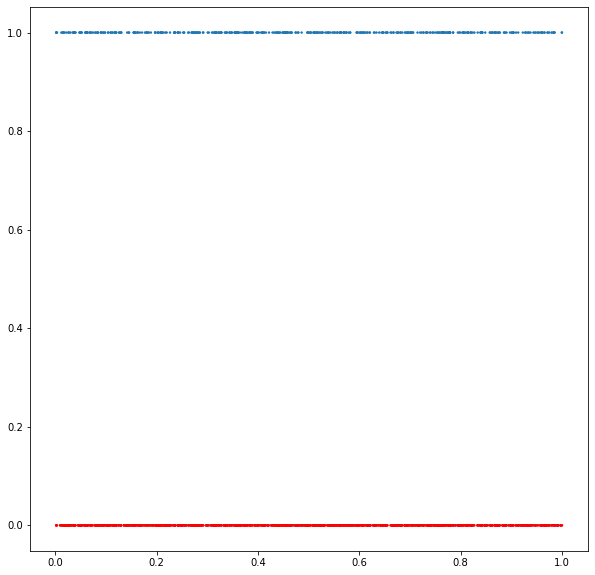

In [31]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def make_data(num_points):
    x = np.random.rand(num_points, 1)
    y = np.random.rand(num_points, 1)
    y = np.ravel(np.round(y))
    return x, y

def plot(x, y, model):
    plt.figure(figsize=(10, 10))
    plt.scatter(x, y, [2]*len(x))
    y_pred = model.predict(x)
    plt.scatter(x, y_pred, [2]*len(x), color='red')

num_points = 1000
with mlflow.start_run():
    x, y = make_data(num_points)
    model = LogisticRegression()
    model.fit(x, y)
    plot(x, y, model)